<a href="https://colab.research.google.com/github/daniellesarusi/home-assignment-2/blob/main/final_project_partB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install Node2Vec
import os
import networkx as nx
import pandas as pd
from node2vec import Node2Vec
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_distances
import csv


# Create an empty graph
original_graph = nx.Graph()

# Read the core.cites input file
with open('/content/drive/MyDrive/final project/cora.cites', 'r') as file:
    for line in file:
        # Split the line into two nodes
        source, target = line.strip().split()

        # Add the nodes and edge to the graph
        original_graph.add_node(source)
        original_graph.add_node(target)
        original_graph.add_edge(source, target)

# Print the nodes and edges of the graph
print("Number of original nodes graph: " ,len(original_graph.nodes))
print("Number of original edges graph: ", len(original_graph.edges))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
Number of original nodes graph:  2708
Number of original edges graph:  5278


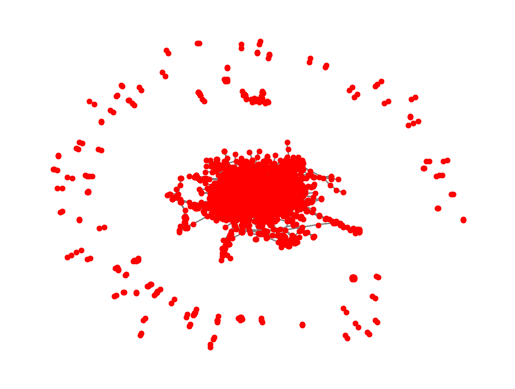

In [7]:
# Draw the graph
pos = nx.spring_layout(original_graph)  # Layout algorithm for node positioning
nx.draw_networkx_nodes(original_graph, pos, node_color='red', node_size=10)
nx.draw_networkx_edges(original_graph, pos, edge_color='gray')

# Show the graph
plt.axis('off')
plt.show()

In [2]:
# def txt_to_dict(file_path, delimiter=':'):
#     result = {}
#     with open(file_path, 'r') as file:
#         for line in file:
#             line = line.strip()  # Remove leading/trailing whitespace
#             if line:  # Skip empty lines
#                 key, value = line.split(delimiter, 1)  # Split line into key and value
#                 result[key.strip()] = value.strip()  # Store key-value pair in dictionary
#     return result

# file_path_for_10 = '/content/drive/MyDrive/final project/dictionary_for_best_10_percent.txt'  # Replace with your file path
# my_dict_10 = txt_to_dict(file_path_for_10)
# print(my_dict_10)
# file_path_for_5 = '/content/drive/MyDrive/final project/dictionary_for_best_5_percent.txt'
# my_dict_5 = txt_to_dict(file_path_for_5)
# print(my_dict_5)


# # Initialize a counters dictionary for the predicted edges
# counter_for_best_10_percent = my_dict_10
# counter_for_best_5_percent = my_dict_5


{"('645046', '646334')": '19', "('409725', '8766')": '9', "('159084', '1152711')": '9', "('159085', '241821')": '21', "('129045', '1108363')": '13', "('642920', '642930')": '14', "('294126', '649944')": '8', "('74920', '1105877')": '11', "('1131420', '648121')": '10', "('154023', '1133846')": '9', "('1132857', '683294')": '14', "('314459', '80515')": '17', "('232605', '232606')": '9', "('626530', '626531')": '9', "('193347', '612306')": '14', "('13024', '899119')": '10', "('235670', '235683')": '19', "('1109830', '162080')": '9', "('44017', '206524')": '10', "('52000', '1104809')": '11', "('14428', '14431')": '19', "('73119', '14430')": '20', "('1103969', '34082')": '12', "('31349', '686532')": '15', "('1103969', '14429')": '20', "('1131223', '561593')": '7', "('14429', '14430')": '20', "('1104809', '52007')": '14', "('235679', '689439')": '12', "('7532', '1121603')": '12', "('34082', '14430')": '20', "('7532', '80491')": '11', "('14429', '73119')": '13', "('644448', '644494')": '10', 

In [3]:

# print(len(counter_for_best_10_percent))
# print(len(counter_for_best_5_percent))

1531
991


In [8]:
#functions:

# Function takes two parameters: dictionary, which is the dictionary to copy,
# and file_path, which is the path to the output text file.
def copy_dict_to_file(dictionary, file_path):
    with open(file_path, 'w') as file:
        for key, value in dictionary.items():
            file.write(f'{key}: {value}\n')

##################################################################################################################################

def adding_number_of_new_edges_to_dictionary(file_path, number_of_new_edges_for_10_percent, number_of_new_edges_for_5_percent):
  # Open the CSV file in the appropriate mode
  with open(file_path, 'a', newline='') as file:
      writer = csv.writer(file)
      # Write the values to a new row
      writer.writerow([number_of_new_edges_for_10_percent, number_of_new_edges_for_5_percent])

##################################################################################################################################

# convert txt file to csv file.
def convert_txt_to_csv(txt_file, csv_file):
  with open(txt_file, 'r') as file:
      lines = file.readlines()

  # Remove leading/trailing whitespaces and split values by delimiter
  data = [line.strip().split(":") for line in lines]

  with open(csv_file, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerows(data)

##################################################################################################################################

# Sorting the edges according to the counter in the csv file
def sorting_counter_of_edges_in_csv_file(file_path):
  # Read the CSV file
  with open(file_path, 'r') as file:
      reader = csv.reader(file)
      data = list(reader)

  # Sort the data by the second column
  sorted_data = sorted(data, key=lambda row: int(row[1]))

  # Write the sorted data to a new CSV file
  with open(file_path, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerows(sorted_data)




In [ ]:
# Initialize a counters dictionary for the predicted edges
counter_for_best_10_percent = {}
counter_for_best_5_percent = {}
num_of_new_edges_for_best_10_percent = 0
num_of_new_edges_for_best_5_percent = 0

# Iterate for 100 iterations
for i in range(100):
    # Create a copy of the original graph for each iteration
    graph = original_graph.copy()

    # Calculate the number of edges to delete (30% of current edges)
    num_edges_to_delete = int(0.3 * graph.number_of_edges())
    
    # Select random edges to delete
    edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)
    
    # Remove the selected edges from the copy graph
    graph.remove_edges_from(edges_to_delete)
    
    # Print information about the current iteration
    print(f"Iteration {i+1}: Deleted {num_edges_to_delete} edges")
    print(f"Remaining number of nodes: {graph.number_of_nodes()}")
    print(f"Remaining number of edges: {graph.number_of_edges()}")
    print()
    

    ##################################################################################################

    # Perform node embedding using Node2Vec
    node2vec = Node2Vec(graph, dimensions=128, walk_length=30, num_walks=200, workers=4)
    model = node2vec.fit(window=10, min_count=1, batch_words=4)
    
    # Get the node embeddings
    node_embeddings = {node: model.wv[node] for node in graph.nodes()}
    
    ##################################################################################################

    # Perform link prediction
    predicted_edges = []
    for edge in edges_to_delete:
        source, target = edge
        source_embedding = model.wv[source]
        target_embedding = model.wv[target]
        distance = cosine_distances([source_embedding], [target_embedding])[0][0]
        predicted_edges.append((edge, distance))
    
    # Sort the predicted edges by distance in ascending order
    predicted_edges.sort(key=lambda x: x[1])
    
  ##################################################################################################

    # Select the 10% edges with the lowest distance
    num_edges_to_select_for_best_10_percent = int(0.1 * len(predicted_edges))
    selected_edges_for_best_10_percent = predicted_edges[:num_edges_to_select_for_best_10_percent]
    print("The number of 10% edges with the lowest distance ", num_edges_to_select_for_best_10_percent)
    print(selected_edges_for_best_10_percent)

    # Select the 5% edges with the lowest distance
    num_edges_to_select_for_best_5_percent = int(0.05 * len(predicted_edges))
    selected_edges_for_best_5_percent = predicted_edges[:num_edges_to_select_for_best_5_percent]
    print("The number of 5% edges with the lowest distance ", num_edges_to_select_for_best_5_percent)
    print(selected_edges_for_best_5_percent)
    
  ##################################################################################################

    # Update the counters dictionaries

    edges_for_best_10_percent =[cell[0] for cell in selected_edges_for_best_10_percent]
    for edge in edges_for_best_10_percent:
        if edge in counter_for_best_10_percent:
            counter_for_best_10_percent[edge] += 1
        else:
            counter_for_best_10_percent[edge] = 1
            num_of_new_edges_for_best_10_percent +=1

    print("The number of new edges added to the dictionary of 10% predicted edges is: ", num_of_new_edges_for_best_10_percent)

    edges_for_best_5_percent =[cell[0] for cell in selected_edges_for_best_5_percent]
    for edge in edges_for_best_5_percent:
        if edge in counter_for_best_5_percent:
            counter_for_best_5_percent[edge] += 1
        else:
            counter_for_best_5_percent[edge] = 1
            num_of_new_edges_for_best_5_percent +=1
    
    print("The number of new edges added to the dictionary of 5% predicted edges is: ", num_of_new_edges_for_best_5_percent)
  
  ##################################################################################################

    print()
    print()
    # Writing to the 'link prediction.csv' file the number of new edges predicted in each iteration
    adding_number_of_new_edges_to_dictionary('/content/drive/MyDrive/final project/link prediction.csv', num_of_new_edges_for_best_10_percent, num_of_new_edges_for_best_5_percent)

    #Saving the dictionaries into files
    copy_dict_to_file(counter_for_best_10_percent, '/content/drive/MyDrive/final project/dictionary_for_best_10_percent.txt')
    copy_dict_to_file(counter_for_best_5_percent, '/content/drive/MyDrive/final project/dictionary_for_best_5_percent.txt')


Iteration 1: Deleted 1583 edges
Remaining number of nodes: 2708
Remaining number of edges: 3695



<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('13024', '899119'), 0.00019067526), (('145315', '294126'), 0.00021231174), (('1132857', '683294'), 0.00022304058), (('1105877', '74921'), 0.00023031235), (('1154012', '626574'), 0.00045239925), (('648112', '648121'), 0.00059115887), (('159084', '159085'), 0.0011931658), (('409725', '8766'), 0.0013616085), (('1152711', '241821'), 0.0016645193), (('1152711', '159085'), 0.0016928911), (('626531', '626574'), 0.002824366), (('28447', '95642'), 0.009079456), (('1117618', '216878'), 0.012397528), (('52000', '52003'), 0.013055563), (('334153', '1117618'), 0.014602661), (('57773', '1154524'), 0.016549706), (('314459', '80515'), 0.020403564), (('193354', '193347'), 0.021733046), (('753070', '753264'), 0.023007393), (('34082', '14430'), 0.025299788), (('1121603', '80515'), 0.02538544), (('232605', '232606'), 0.025890231), (('87915', '1110209'), 0.026444316), (('14429', '34082'), 0.027108014), (('235679', '235683'), 0.027405918), (('504', '1

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('294126', '649944'), 0.00012922287), (('52000', '52007'), 0.000284791), (('1131421', '648112'), 0.00031900406), (('52003', '73712'), 0.0003207922), (('1103969', '34082'), 0.00037992), (('74921', '74937'), 0.00038927794), (('1152711', '159085'), 0.00043696165), (('159085', '241821'), 0.00047326088), (('642920', '1131184'), 0.0005149245), (('746058', '739280'), 0.00078487396), (('57773', '1154524'), 0.014028847), (('1153097', '409255'), 0.014112651), (('1103969', '14429'), 0.015832663), (('1138027', '315789'), 0.015846074), (('14429', '34082'), 0.016058624), (('57773', '235679'), 0.01758343), (('504', '1102364'), 0.021166861), (('14429', '14431'), 0.021658301), (('34082', '1119216'), 0.02280128), (('14429', '73119'), 0.025846124), (('561610', '561611'), 0.026213944), (('235670', '235678'), 0.026598155), (('612306', '193352'), 0.027878284), (('141171', '75318'), 0.032330334), (('1103394', '22564'), 0.032492876), (('1131719', '193347

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('682508', '1132857'), 0.00016641617), (('1131184', '642930'), 0.00016880035), (('334153', '1117618'), 0.00020354986), (('159084', '241821'), 0.00023323298), (('52000', '1104809'), 0.00026667118), (('1138027', '315789'), 0.0002900362), (('154023', '1112106'), 0.00043720007), (('1112194', '73712'), 0.00055134296), (('145315', '294126'), 0.00084620714), (('1131421', '648112'), 0.0071069), (('235679', '235683'), 0.011030555), (('126909', '126926'), 0.014687657), (('1102364', '506'), 0.016278327), (('561568', '561613'), 0.016398847), (('1213', '409725'), 0.016483963), (('193347', '193352'), 0.01761043), (('34082', '1119216'), 0.019016266), (('57773', '235679'), 0.021040201), (('1121603', '314459'), 0.021466553), (('14428', '14429'), 0.023167849), (('73119', '14430'), 0.028772175), (('1119216', '14430'), 0.029417813), (('58268', '13024'), 0.030878007), (('134316', '65074'), 0.031522036), (('359067', '239810'), 0.031586587), (('5194', '

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('642920', '642930'), 0.0002540946), (('74920', '74937'), 0.0002797246), (('190697', '198443'), 0.0005235076), (('1104809', '52003'), 0.0006698966), (('232605', '25413'), 0.00124681), (('14429', '14430'), 0.005697131), (('1121603', '314459'), 0.008793116), (('13024', '899119'), 0.012615383), (('14428', '14429'), 0.013621688), (('648112', '1131420'), 0.016673088), (('235670', '235679'), 0.018327773), (('1138027', '315789'), 0.018829465), (('1213', '409725'), 0.019989014), (('57773', '1154524'), 0.020103455), (('14429', '14431'), 0.023555696), (('1154524', '235683'), 0.025189579), (('27199', '42209'), 0.028490365), (('314459', '80491'), 0.03028357), (('648106', '648121'), 0.030454993), (('1127812', '567018'), 0.03195429), (('1114398', '192870'), 0.03240609), (('34266', '87482'), 0.035541773), (('13652', '80656'), 0.037055492), (('7532', '80515'), 0.037277818), (('111866', '64319'), 0.038172722), (('644470', '644494'), 0.038679123), 

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('52003', '73712'), 0.00023162365), (('7867', '1138027'), 0.0002706051), (('642920', '642930'), 0.0002976656), (('159085', '241821'), 0.0003144741), (('102938', '102939'), 0.0003452897), (('145315', '649944'), 0.00037634373), (('137956', '58268'), 0.000413239), (('242663', '51052'), 0.00043541193), (('126867', '126868'), 0.00045019388), (('154023', '1133846'), 0.00070154667), (('14431', '73119'), 0.0010612011), (('1105877', '74921'), 0.0011184216), (('61417', '94416'), 0.0011304617), (('1105877', '74937'), 0.001642406), (('235670', '235683'), 0.0064234734), (('1103031', '14431'), 0.0071752667), (('14429', '14430'), 0.007945299), (('1129835', '193354'), 0.0125691295), (('684986', '684972'), 0.015076101), (('648106', '648121'), 0.016850352), (('1133428', '696343'), 0.018228114), (('1131719', '612306'), 0.019323945), (('14428', '1103031'), 0.022145867), (('34082', '14430'), 0.022868335), (('1213', '8766'), 0.023040473), (('80515', '8

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1152711', '159085'), 0.00020742416), (('126867', '126868'), 0.00020831823), (('1131421', '648112'), 0.00032436848), (('74920', '74937'), 0.00047826767), (('367312', '746058'), 0.0005788803), (('1112106', '154047'), 0.00060629845), (('1129835', '193354'), 0.0011145473), (('102938', '102939'), 0.0013108253), (('1237', '143676'), 0.0018493533), (('1154012', '626574'), 0.004566729), (('626530', '626531'), 0.0069978237), (('7867', '315789'), 0.010462284), (('14428', '73119'), 0.016426384), (('34082', '1119216'), 0.016639411), (('1121603', '314459'), 0.019568443), (('14429', '14430'), 0.022037148), (('648112', '648121'), 0.022294998), (('1104809', '52003'), 0.022308707), (('314459', '80491'), 0.022431254), (('18770', '531351'), 0.02324605), (('52003', '73712'), 0.023670256), (('57773', '235670'), 0.024626553), (('561610', '561611'), 0.025088906), (('7532', '80515'), 0.028710723), (('1122642', '90655'), 0.029156148), (('155736', '28649

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('573535', '693143'), 0.00015050173), (('693143', '695284'), 0.00019675493), (('1108258', '126868'), 0.00022256374), (('642920', '642930'), 0.0002464652), (('1152711', '241821'), 0.00038290024), (('102938', '102939'), 0.0005540848), (('159084', '241821'), 0.00058710575), (('264556', '335042'), 0.000621438), (('74920', '1105877'), 0.00084108114), (('1131116', '148341'), 0.0009420514), (('367312', '739280'), 0.00096970797), (('648106', '1131421'), 0.0015788078), (('1131420', '648121'), 0.0016233921), (('1129835', '193354'), 0.002518475), (('409725', '8766'), 0.0027045012), (('626530', '1130454'), 0.003448844), (('504', '506'), 0.0059788227), (('1131314', '644494'), 0.008473158), (('1103969', '34082'), 0.011126757), (('12631', '12638'), 0.01273185), (('626530', '626574'), 0.0143710375), (('193347', '193352'), 0.015374899), (('1115375', '282700'), 0.01563096), (('57773', '235670'), 0.017927945), (('14431', '14430'), 0.019278288), (('1

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('58268', '899119'), 0.00029480457), (('642920', '642930'), 0.00046277046), (('367312', '746058'), 0.0004877448), (('159084', '159085'), 0.00083065033), (('294126', '649944'), 0.000834465), (('159085', '241821'), 0.0011767745), (('1121603', '80515'), 0.0023450851), (('14431', '73119'), 0.004169047), (('1130454', '626531'), 0.0053118467), (('626530', '626574'), 0.00726825), (('193354', '193347'), 0.0074220896), (('57773', '235670'), 0.01082778), (('646334', '646357'), 0.015331328), (('80515', '80491'), 0.01763618), (('235670', '235678'), 0.020170093), (('7867', '1138027'), 0.02037859), (('1102364', '506'), 0.024673104), (('235678', '235679'), 0.027390838), (('7532', '314459'), 0.028394341), (('67584', '1127566'), 0.030629158), (('470511', '77829'), 0.030673504), (('57773', '235683'), 0.032363474), (('14429', '14430'), 0.03239423), (('633585', '40605'), 0.03256929), (('22566', '22564'), 0.032923877), (('18770', '531348'), 0.03500884

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1108258', '126868'), 0.00014293194), (('746058', '739280'), 0.00019490719), (('682508', '683294'), 0.0002374649), (('1104809', '52007'), 0.0004284382), (('753047', '1136631'), 0.0006314516), (('145315', '649944'), 0.00070369244), (('159084', '1152711'), 0.00079876184), (('159085', '241821'), 0.00088202953), (('1152711', '159085'), 0.00095021725), (('1133846', '154047'), 0.00095260143), (('626530', '626531'), 0.0014667511), (('154023', '1112106'), 0.0015314817), (('57773', '1154524'), 0.00556612), (('235678', '689439'), 0.008287549), (('235670', '235678'), 0.008394301), (('1103031', '14431'), 0.009621978), (('193347', '193352'), 0.010745704), (('646334', '646357'), 0.012829304), (('1131314', '644494'), 0.013353348), (('1104809', '52003'), 0.018062115), (('504', '506'), 0.018540502), (('648112', '1131420'), 0.018728912), (('232605', '25413'), 0.018755317), (('648112', '648121'), 0.02003026), (('14431', '73119'), 0.02222979), (('52

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('746058', '739280'), 0.00020325184), (('1104809', '52007'), 0.00030386448), (('642920', '1131184'), 0.00037574768), (('74920', '1105877'), 0.00040119886), (('626530', '1154012'), 0.00077843666), (('561568', '561613'), 0.00088077784), (('154023', '1133846'), 0.00088882446), (('13652', '80656'), 0.0010757446), (('154023', '154047'), 0.0011846423), (('626530', '1130454'), 0.0018892288), (('13024', '899119'), 0.0029159784), (('504', '506'), 0.008779705), (('14431', '14430'), 0.010040522), (('134316', '142268'), 0.010515332), (('1154524', '235683'), 0.011458933), (('646334', '646357'), 0.016098142), (('1129572', '563613'), 0.021222174), (('561581', '561582'), 0.022414386), (('235670', '235683'), 0.022624731), (('1103031', '14429'), 0.023734808), (('75318', '1121569'), 0.023830414), (('235679', '235683'), 0.02503717), (('14428', '14429'), 0.025678813), (('133550', '140569'), 0.025966883), (('1104809', '52003'), 0.026364267), (('1154525

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('159084', '1152711'), 0.00019598007), (('1112106', '154047'), 0.00022006035), (('118259', '118260'), 0.00026279688), (('13205', '13208'), 0.00028908253), (('1114512', '263482'), 0.0006033182), (('626530', '626574'), 0.0013734102), (('626530', '626531'), 0.0017417669), (('562067', '561789'), 0.005472541), (('57773', '1154524'), 0.0066148043), (('235679', '689439'), 0.0066595674), (('1154524', '235679'), 0.007443309), (('1103031', '14431'), 0.0078058243), (('648106', '648121'), 0.009377599), (('235670', '235679'), 0.010201454), (('1152259', '71736'), 0.015093803), (('57773', '235679'), 0.017007172), (('14429', '14431'), 0.018836617), (('193354', '193352'), 0.02055037), (('1213', '8766'), 0.024284303), (('80515', '80491'), 0.024777174), (('1103969', '14429'), 0.025675118), (('573535', '693143'), 0.02625066), (('1152958', '284023'), 0.026626468), (('14428', '34082'), 0.026792288), (('14428', '73119'), 0.02687776), (('645046', '646334

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1131741', '654339'), 0.00020116568), (('642920', '1131184'), 0.00021409988), (('159085', '241821'), 0.0004120469), (('74921', '74937'), 0.0005842447), (('1132857', '683294'), 0.0006054044), (('1112194', '73712'), 0.00093209743), (('126867', '1108258'), 0.0010716915), (('154023', '154047'), 0.0011461973), (('1133846', '154047'), 0.0017821193), (('367312', '739280'), 0.0025252104), (('14428', '14429'), 0.00454396), (('80515', '80491'), 0.005263388), (('1154524', '235683'), 0.010900438), (('34082', '14430'), 0.013858914), (('14429', '1119216'), 0.014205217), (('58268', '13024'), 0.014420986), (('235670', '235679'), 0.016233683), (('1154012', '626574'), 0.018957853), (('1131223', '561593'), 0.018979907), (('1154524', '235679'), 0.019758701), (('235678', '235679'), 0.021627188), (('235678', '235683'), 0.023800611), (('1130454', '626531'), 0.02453214), (('626530', '626531'), 0.024877906), (('14429', '14431'), 0.028260767), (('1103394'

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1112106', '154047'), 0.00023704767), (('1106764', '94416'), 0.0002449751), (('1133846', '154047'), 0.00026094913), (('7867', '315789'), 0.0003786087), (('67245', '67246'), 0.00042128563), (('1131184', '642930'), 0.00042158365), (('1105877', '74921'), 0.00047314167), (('1108258', '126868'), 0.00055634975), (('66751', '573535'), 0.00068998337), (('58268', '13024'), 0.00083720684), (('57773', '1154524'), 0.003201902), (('193354', '193352'), 0.009953916), (('612306', '193352'), 0.016479969), (('11148', '193354'), 0.017003775), (('645046', '646334'), 0.01712215), (('314459', '80515'), 0.017397404), (('626531', '626574'), 0.018229008), (('1103031', '14431'), 0.020777345), (('34082', '14430'), 0.020937026), (('1136631', '767763'), 0.022527456), (('103543', '126909'), 0.02537781), (('102938', '102939'), 0.02720046), (('645084', '645088'), 0.030608058), (('1110209', '142268'), 0.031241655), (('1114192', '256106'), 0.03251046), (('14428',

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('52000', '52007'), 0.00014984608), (('159084', '159085'), 0.00021195412), (('58268', '13024'), 0.00022828579), (('1110563', '179180'), 0.00025063753), (('1112194', '73712'), 0.00026249886), (('1112106', '154047'), 0.00029569864), (('206524', '48075'), 0.00038087368), (('74921', '74937'), 0.00042170286), (('648106', '1131421'), 0.0006440878), (('1152958', '284023'), 0.00080931187), (('1109830', '162080'), 0.00093626976), (('1121603', '80515'), 0.001052618), (('367312', '746058'), 0.0012946129), (('235670', '235683'), 0.0016283989), (('235679', '235683'), 0.002292335), (('66751', '693143'), 0.013200343), (('66751', '573535'), 0.014867604), (('14428', '1103969'), 0.01557827), (('80515', '80491'), 0.016226888), (('73119', '14430'), 0.016665101), (('126909', '126926'), 0.01787579), (('561568', '561613'), 0.02080983), (('645046', '646334'), 0.021121025), (('1123188', '662416'), 0.021202326), (('334153', '1117618'), 0.02488184), (('1115

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('642920', '642930'), 0.00018936396), (('1131420', '648121'), 0.0002502203), (('126867', '1108258'), 0.00026500225), (('52000', '1104809'), 0.0002772808), (('294126', '649944'), 0.0002875328), (('1152711', '159085'), 0.0004440546), (('159085', '241821'), 0.00047940016), (('1153097', '409255'), 0.0007035732), (('1129835', '193354'), 0.00084519386), (('367312', '739280'), 0.0012646914), (('102938', '143676'), 0.0016157627), (('58268', '13024'), 0.0021384954), (('102938', '102939'), 0.0029536486), (('626530', '1130454'), 0.0041183233), (('626530', '626531'), 0.0042654276), (('561610', '561611'), 0.006568074), (('235678', '235679'), 0.015871644), (('235670', '235683'), 0.016372323), (('1138027', '315789'), 0.0167737), (('14428', '73119'), 0.01824373), (('1109830', '162080'), 0.020404398), (('14429', '14431'), 0.02207768), (('1213', '8766'), 0.022161365), (('1103969', '14430'), 0.024531543), (('73119', '14430'), 0.024707735), (('110303

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('129042', '129045'), 0.00024068356), (('58552', '1113828'), 0.00033056736), (('52000', '52007'), 0.0004171729), (('1129835', '193354'), 0.00048166513), (('235679', '235683'), 0.00053560734), (('1112106', '154047'), 0.0005456209), (('1132857', '683294'), 0.00072461367), (('159085', '241821'), 0.0012794733), (('159084', '1152711'), 0.0014163256), (('159084', '159085'), 0.0015792251), (('1130454', '626531'), 0.0041674376), (('14431', '73119'), 0.004851043), (('626530', '626531'), 0.005152762), (('648112', '648121'), 0.009116471), (('193347', '612306'), 0.010458469), (('1131421', '648112'), 0.011312485), (('1121569', '179702'), 0.012037754), (('20178', '20179'), 0.01228416), (('7867', '1138027'), 0.015162051), (('255233', '33303'), 0.015354872), (('52003', '73712'), 0.01537776), (('314459', '80491'), 0.015406668), (('52000', '52003'), 0.019032001), (('1153097', '7537'), 0.019079208), (('14429', '34082'), 0.019307017), (('14429', '144

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('642920', '1131184'), 0.00020122528), (('1105877', '74937'), 0.00024354458), (('216877', '1117618'), 0.00034809113), (('746058', '739280'), 0.00039052963), (('1152711', '241821'), 0.00070887804), (('159085', '241821'), 0.0007749796), (('626530', '626574'), 0.0011314154), (('1154012', '626574'), 0.0012186766), (('67584', '1127566'), 0.0027836561), (('7867', '315789'), 0.0040408373), (('7867', '1138027'), 0.0040558577), (('14428', '73119'), 0.009637594), (('1105574', '5454'), 0.00975883), (('14428', '1103969'), 0.011481643), (('1122642', '90655'), 0.012137711), (('470511', '77829'), 0.017008841), (('52003', '73712'), 0.017021418), (('648106', '648112'), 0.017566204), (('102938', '143676'), 0.018114328), (('235679', '235683'), 0.020322144), (('235678', '235683'), 0.020449996), (('1131421', '648112'), 0.021833777), (('1104809', '52003'), 0.024604917), (('102938', '102939'), 0.024965703), (('73119', '14430'), 0.026548922), (('34082', 

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('367312', '746058'), 0.000182271), (('682508', '683294'), 0.00027233362), (('1131184', '642930'), 0.0003119707), (('159084', '241821'), 0.00033837557), (('74920', '74937'), 0.0004632473), (('145315', '294126'), 0.0008355379), (('1103031', '14431'), 0.003402114), (('1104809', '52007'), 0.0047929287), (('235678', '235679'), 0.006561756), (('561568', '561613'), 0.011309028), (('1131420', '648121'), 0.012433529), (('1103969', '14429'), 0.013843596), (('235670', '235683'), 0.015109718), (('1129835', '193354'), 0.01572764), (('1121603', '80515'), 0.016426444), (('14428', '14429'), 0.017787814), (('1153287', '95594'), 0.02140671), (('7532', '314459'), 0.023015797), (('1154524', '235679'), 0.02402234), (('1131236', '644093'), 0.024161518), (('1123188', '662416'), 0.025240421), (('57773', '235670'), 0.026471674), (('675649', '675756'), 0.02978772), (('1102364', '506'), 0.030791521), (('28649', '155738'), 0.03457564), (('14428', '34082'), 

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('126867', '126868'), 0.00020211935), (('159085', '241821'), 0.00022912025), (('145315', '294126'), 0.00023263693), (('1132857', '683294'), 0.00026875734), (('7867', '315789'), 0.0016118288), (('16843', '1152259'), 0.002177298), (('314459', '80491'), 0.0025641918), (('1103031', '14431'), 0.0047438145), (('57773', '235679'), 0.005284846), (('1154524', '235683'), 0.0066388845), (('34082', '1119216'), 0.008484542), (('648112', '1131420'), 0.010564208), (('648106', '1131421'), 0.010745823), (('648106', '648112'), 0.0118588805), (('14429', '1119216'), 0.012360156), (('1121603', '314459'), 0.015359223), (('14428', '14429'), 0.020719886), (('193347', '612306'), 0.020996928), (('561568', '561613'), 0.021190763), (('14428', '73119'), 0.021507263), (('14428', '34082'), 0.022626877), (('52000', '1104809'), 0.02302438), (('235678', '235683'), 0.023361802), (('235678', '235679'), 0.024992764), (('52003', '1112194'), 0.02643621), (('57773', '23

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1213', '8766'), 0.00026202202), (('642920', '642930'), 0.00029611588), (('1112106', '154047'), 0.00029736757), (('126867', '126868'), 0.0003452897), (('504', '506'), 0.00037944317), (('1138027', '315789'), 0.00065261126), (('1153097', '409255'), 0.0022966266), (('1131420', '648121'), 0.0042510033), (('648112', '648121'), 0.004541397), (('235670', '235678'), 0.0058001876), (('506', '1106546'), 0.012131274), (('561568', '561613'), 0.014698625), (('235679', '235683'), 0.017113447), (('566653', '566664'), 0.018450797), (('626531', '626574'), 0.021552563), (('1121603', '80515'), 0.022823751), (('14431', '14430'), 0.023111224), (('52000', '1104809'), 0.02312088), (('14431', '73119'), 0.024078488), (('531348', '531351'), 0.026005447), (('34263', '90655'), 0.027084291), (('314459', '80491'), 0.027320385), (('1127566', '562067'), 0.030209184), (('14428', '34082'), 0.03034854), (('14428', '1103031'), 0.0303635), (('1114192', '256106'), 0.

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('642920', '642930'), 0.00018620491), (('1152711', '159085'), 0.00021481514), (('154023', '1112106'), 0.00022006035), (('1105877', '74937'), 0.00027507544), (('648112', '1131420'), 0.0002872944), (('1132857', '683294'), 0.0003093481), (('409725', '8766'), 0.0011441708), (('57773', '1154524'), 0.002891481), (('7867', '315789'), 0.0029738545), (('57773', '235670'), 0.0032663941), (('1103031', '14431'), 0.010564446), (('52000', '1104809'), 0.012136102), (('14429', '14430'), 0.012244999), (('646334', '646357'), 0.014187813), (('80515', '80491'), 0.015189886), (('34082', '14430'), 0.015255332), (('235670', '235678'), 0.017400622), (('57773', '235679'), 0.018183887), (('1128407', '38846'), 0.019389093), (('14428', '73119'), 0.02046287), (('9586', '1120138'), 0.02281326), (('1120138', '78557'), 0.024095297), (('58268', '899119'), 0.026723623), (('73119', '14430'), 0.027282), (('1127566', '562067'), 0.03000474), (('1153097', '7537'), 0.03

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('746058', '739280'), 0.00019609928), (('1152711', '241821'), 0.0002374053), (('145315', '649944'), 0.00026470423), (('682508', '1132857'), 0.00026506186), (('159084', '159085'), 0.0002951622), (('1138027', '315789'), 0.00030642748), (('154023', '1112106'), 0.0005067587), (('31769', '67245'), 0.00057572126), (('74920', '74937'), 0.0006286502), (('1105877', '74921'), 0.00070655346), (('648106', '648112'), 0.0008574724), (('648106', '1131421'), 0.0012619495), (('148341', '263069'), 0.002429545), (('1122642', '90655'), 0.004244685), (('103531', '656048'), 0.011983871), (('57773', '235670'), 0.012988269), (('235670', '235683'), 0.018905163), (('14428', '14431'), 0.019436002), (('1119216', '14430'), 0.020296335), (('235679', '235683'), 0.021654487), (('52000', '1104809'), 0.021798074), (('14431', '14430'), 0.021937966), (('57773', '1154524'), 0.023047805), (('14428', '1103969'), 0.023750782), (('612306', '193352'), 0.024722278), (('753

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('746058', '739280'), 0.00021284819), (('74920', '1105877'), 0.00024682283), (('1113828', '248395'), 0.00028848648), (('159084', '1152711'), 0.00037825108), (('1152711', '241821'), 0.00040638447), (('1106764', '94416'), 0.00050228834), (('1104809', '52003'), 0.0005274415), (('255233', '33303'), 0.00072813034), (('1130454', '626531'), 0.00073313713), (('154023', '1133846'), 0.00082963705), (('154023', '154047'), 0.00083595514), (('1129835', '193354'), 0.002013743), (('193347', '193352'), 0.002212584), (('235670', '235683'), 0.003191948), (('1131421', '648112'), 0.0041627884), (('14431', '14430'), 0.012214959), (('34082', '1119216'), 0.012370408), (('14431', '73119'), 0.013487637), (('646334', '646357'), 0.01538372), (('1119216', '14430'), 0.01851368), (('14428', '34082'), 0.018915296), (('753264', '767763'), 0.022356272), (('111866', '64319'), 0.022542238), (('753070', '753047'), 0.02270478), (('141171', '75318'), 0.024386525), (('

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1152711', '241821'), 0.00020563602), (('294126', '649944'), 0.00022238493), (('126867', '1108258'), 0.00027740002), (('682508', '683294'), 0.00030893087), (('154023', '1133846'), 0.00084650517), (('7867', '1138027'), 0.00087475777), (('52003', '1112194'), 0.00089132786), (('1131420', '648121'), 0.0010319352), (('1131719', '193347'), 0.0010561943), (('648112', '648121'), 0.0011557341), (('626530', '626531'), 0.002447307), (('193354', '193347'), 0.010249138), (('1133428', '696343'), 0.01109463), (('7532', '314459'), 0.014731169), (('66751', '693143'), 0.01482296), (('314459', '80515'), 0.015005112), (('141171', '1121569'), 0.016520977), (('58268', '899119'), 0.01749432), (('1114398', '192870'), 0.018858671), (('232605', '232606'), 0.019025564), (('14431', '73119'), 0.021210313), (('1129835', '193354'), 0.021401763), (('1111186', '192870'), 0.021518588), (('1119216', '14430'), 0.025886774), (('612306', '193352'), 0.026491284), (('2

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('294126', '649944'), 0.0002092123), (('52000', '52007'), 0.000279665), (('74920', '1105877'), 0.00030112267), (('159084', '241821'), 0.00030863285), (('1132857', '683294'), 0.0003118515), (('52003', '73712'), 0.0005478859), (('7867', '315789'), 0.0010750294), (('753070', '753264'), 0.0019418597), (('25413', '232606'), 0.0021656752), (('753070', '767763'), 0.011762083), (('648106', '1131421'), 0.012079477), (('506', '89416'), 0.013991475), (('314459', '80515'), 0.02093345), (('193347', '193352'), 0.020971894), (('1109830', '162080'), 0.022241533), (('1115701', '289885'), 0.02246499), (('1117920', '142268'), 0.02342546), (('14428', '14429'), 0.024102509), (('1103969', '14430'), 0.024197042), (('1103031', '14431'), 0.026101112), (('648112', '648121'), 0.027570069), (('23070', '65074'), 0.028461516), (('235670', '235679'), 0.033505917), (('1131420', '648121'), 0.03466022), (('235679', '235683'), 0.0347839), (('589923', '590022'), 0.0

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('367312', '746058'), 0.00019216537), (('1105877', '74937'), 0.00020241737), (('654326', '1131741'), 0.00031387806), (('626530', '1154012'), 0.0003258586), (('1152711', '159085'), 0.0003556013), (('145315', '649944'), 0.00035959482), (('154023', '1133846'), 0.00041246414), (('648112', '1131420'), 0.0022268295), (('1131421', '648112'), 0.0023779273), (('235670', '235678'), 0.0038144588), (('7867', '1138027'), 0.013779521), (('504', '1102364'), 0.017160773), (('1154524', '235679'), 0.017821193), (('1213', '8766'), 0.018386006), (('626530', '626531'), 0.01945877), (('11148', '193354'), 0.020317018), (('235670', '235679'), 0.020323038), (('1103969', '14430'), 0.020600438), (('561568', '561613'), 0.022307754), (('58268', '13024'), 0.022365332), (('645046', '646357'), 0.024488032), (('1122642', '90655'), 0.024610221), (('1110209', '142268'), 0.025314927), (('235678', '235679'), 0.025971055), (('1105148', '13208'), 0.026857018), (('62653

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('145315', '294126'), 0.0002669692), (('1113828', '248395'), 0.0002964139), (('682508', '1132857'), 0.00038647652), (('1130454', '626531'), 0.000492692), (('693143', '695284'), 0.00055605173), (('126867', '126868'), 0.0005969405), (('1105877', '74921'), 0.000665009), (('58268', '13024'), 0.0012307763), (('1131421', '648112'), 0.010344684), (('52000', '1104809'), 0.013807654), (('14429', '34082'), 0.01405704), (('57773', '235683'), 0.014308572), (('14431', '14430'), 0.01484412), (('14429', '73119'), 0.015439928), (('57773', '235679'), 0.016148925), (('14428', '1103031'), 0.01965338), (('1213', '8766'), 0.020106912), (('626530', '626574'), 0.020174742), (('129045', '1108363'), 0.020578861), (('129045', '1121313'), 0.020792007), (('1119216', '14430'), 0.0218395), (('504', '1102364'), 0.02256757), (('626531', '626574'), 0.02266568), (('242663', '51045'), 0.023343146), (('644448', '1131314'), 0.02415818), (('25413', '232606'), 0.028688

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1112106', '154047'), 0.00043654442), (('159085', '241821'), 0.0006015897), (('159084', '1152711'), 0.000656724), (('1152711', '241821'), 0.00066256523), (('1138027', '315789'), 0.0006759167), (('1153097', '409255'), 0.00075143576), (('19045', '593328'), 0.0008918047), (('87363', '593329'), 0.0009943843), (('1105877', '74921'), 0.0012463927), (('1131421', '648112'), 0.0020266771), (('648112', '1131420'), 0.0026144385), (('235670', '235683'), 0.005921364), (('235678', '235679'), 0.0067955256), (('1129835', '193347'), 0.011210561), (('1131719', '193347'), 0.012004554), (('1109830', '162080'), 0.012927234), (('1103031', '14431'), 0.016659617), (('1122642', '90655'), 0.016707718), (('1127812', '567018'), 0.020982265), (('7532', '80515'), 0.021188855), (('14428', '14429'), 0.021664023), (('1131223', '561593'), 0.022043586), (('52000', '1104809'), 0.022280812), (('1129835', '193354'), 0.02249062), (('14429', '14430'), 0.025378942), (('

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1131741', '654339'), 0.0002734065), (('642920', '1131184'), 0.0003244877), (('159085', '241821'), 0.00038260221), (('753047', '767763'), 0.00049448013), (('1152711', '241821'), 0.0006457567), (('74920', '1105877'), 0.0006619096), (('626531', '626574'), 0.0006684661), (('753070', '753047'), 0.00086927414), (('57773', '1154524'), 0.009360611), (('34082', '1119216'), 0.009732842), (('1121603', '314459'), 0.010643005), (('57773', '235683'), 0.01072365), (('133550', '140569'), 0.012458384), (('648112', '648121'), 0.014164805), (('14429', '14431'), 0.014347851), (('52003', '73712'), 0.016707242), (('7532', '80515'), 0.017318606), (('1131421', '648112'), 0.019482017), (('1131420', '648121'), 0.02013886), (('58268', '899119'), 0.021450043), (('235678', '235679'), 0.023023486), (('129042', '1108363'), 0.023701191), (('1213', '409725'), 0.023775756), (('235678', '689439'), 0.023923159), (('14429', '1119216'), 0.024141014), (('1154525', '8

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('126867', '1108258'), 0.00018209219), (('1104809', '52007'), 0.00023448467), (('159085', '241821'), 0.0004067421), (('1131184', '642930'), 0.00079369545), (('66751', '693143'), 0.0017955899), (('235670', '235679'), 0.0049915314), (('80515', '80491'), 0.0076208115), (('34082', '1119216'), 0.010289073), (('162075', '162080'), 0.013543665), (('66751', '695284'), 0.018086612), (('648106', '648121'), 0.019667804), (('1103969', '34082'), 0.02084732), (('14429', '14430'), 0.024038732), (('193347', '612306'), 0.024183989), (('14428', '14429'), 0.024312258), (('13024', '899119'), 0.026772201), (('14429', '73119'), 0.027377248), (('1104809', '52003'), 0.02801913), (('34263', '90655'), 0.028598547), (('1117920', '142268'), 0.029660344), (('1133428', '696343'), 0.03196001), (('633585', '884094'), 0.033789694), (('14428', '1103969'), 0.033821344), (('1102364', '506'), 0.03491521), (('1123188', '12638'), 0.03590876), (('118259', '118260'), 0.0

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('682508', '683294'), 0.00016748905), (('1138027', '315789'), 0.0002502203), (('626530', '1154012'), 0.00044858456), (('642920', '642930'), 0.00046908855), (('1133846', '154047'), 0.00067311525), (('263486', '1114512'), 0.0008199215), (('367312', '746058'), 0.0008471012), (('1104809', '52007'), 0.0082858205), (('14428', '14431'), 0.012889147), (('648112', '648121'), 0.012904108), (('193347', '612306'), 0.016449094), (('1122642', '213246'), 0.019663572), (('646334', '646357'), 0.019981086), (('1103969', '14430'), 0.022796512), (('14431', '14430'), 0.025366843), (('1122642', '90655'), 0.026200712), (('73119', '14430'), 0.029141665), (('1153728', '198866'), 0.030717492), (('470511', '77829'), 0.03142643), (('107251', '107252'), 0.03282261), (('561581', '561595'), 0.03290713), (('235679', '235683'), 0.03296888), (('155736', '28649'), 0.03363371), (('242663', '51045'), 0.033873558), (('504', '1102364'), 0.033979), (('91852', '20179'), 

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('7867', '1138027'), 0.00024056435), (('159084', '241821'), 0.0002425313), (('1154012', '626574'), 0.00025963783), (('648106', '1131421'), 0.00029170513), (('145315', '294126'), 0.00033462048), (('1105877', '74921'), 0.00037050247), (('1152711', '159085'), 0.00045382977), (('367312', '739280'), 0.0008020401), (('1121603', '80515'), 0.00087559223), (('626531', '626574'), 0.0015200377), (('648106', '648121'), 0.0018056035), (('34082', '1119216'), 0.0036894083), (('52000', '52007'), 0.006064296), (('33818', '78557'), 0.0069493055), (('235670', '235683'), 0.00876528), (('126909', '126926'), 0.0106550455), (('561595', '561611'), 0.011416674), (('78511', '78552'), 0.01431644), (('11148', '1129835'), 0.015778422), (('235679', '235683'), 0.01652956), (('75318', '1121569'), 0.016746879), (('334153', '1117618'), 0.016763687), (('1122642', '34263'), 0.017557144), (('58268', '13024'), 0.017691433), (('1110209', '142268'), 0.019108772), (('193

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('626530', '1130454'), 0.00025969744), (('746058', '739280'), 0.00028049946), (('159084', '159085'), 0.00047260523), (('1152711', '159085'), 0.0004787445), (('642920', '642930'), 0.0004938245), (('14083', '62676'), 0.00063055754), (('67584', '1127566'), 0.0065707564), (('14431', '73119'), 0.0112018585), (('1131420', '648121'), 0.015535176), (('235670', '235679'), 0.018937945), (('648106', '648112'), 0.019385278), (('57773', '235670'), 0.019505978), (('648106', '1131421'), 0.020878911), (('13024', '899119'), 0.02102828), (('1110998', '188318'), 0.024344206), (('1153097', '409255'), 0.024371266), (('1103031', '14429'), 0.025295377), (('73119', '14430'), 0.025823772), (('1103031', '14430'), 0.029955864), (('143676', '102939'), 0.034290075), (('853116', '853155'), 0.034293056), (('314459', '80515'), 0.036539316), (('89416', '1106546'), 0.036566198), (('1121603', '314459'), 0.037085176), (('645046', '646334'), 0.037888467), (('137956',

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('102938', '102939'), 0.00017261505), (('367312', '746058'), 0.00023496151), (('1112194', '73712'), 0.00024992228), (('294126', '649944'), 0.00026583672), (('1132857', '683294'), 0.00039607286), (('74920', '1105877'), 0.00043994188), (('159085', '241821'), 0.00076532364), (('648106', '648112'), 0.0022117496), (('626530', '1154012'), 0.0022302866), (('626530', '1130454'), 0.002345264), (('1131420', '648121'), 0.0027462244), (('753070', '767763'), 0.0072385073), (('1109830', '162080'), 0.009026408), (('573535', '693143'), 0.01099062), (('1129835', '193354'), 0.013408899), (('1138027', '315789'), 0.016824067), (('14428', '1103969'), 0.018289804), (('14429', '34082'), 0.018630803), (('1213', '8766'), 0.019443512), (('14428', '14431'), 0.020281315), (('1122642', '34263'), 0.02030474), (('1121603', '314459'), 0.020376801), (('232605', '232606'), 0.020599365), (('235670', '235678'), 0.0210706), (('1119216', '14430'), 0.025655985), (('577

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('74920', '74937'), 0.00019311905), (('154023', '1133846'), 0.0002310276), (('1132857', '683294'), 0.00025212765), (('648112', '1131420'), 0.00037026405), (('162075', '1109830'), 0.00039333105), (('367312', '739280'), 0.0007688999), (('57773', '235683'), 0.0017488003), (('13024', '899119'), 0.0017670393), (('314459', '80515'), 0.0018714666), (('626530', '1154012'), 0.0062475204), (('1138027', '315789'), 0.013811767), (('14429', '73119'), 0.014629006), (('143676', '102939'), 0.014989972), (('648106', '648112'), 0.018561661), (('633585', '633721'), 0.02027911), (('232605', '232606'), 0.023780823), (('206524', '48075'), 0.025932431), (('578347', '99023'), 0.026468754), (('14428', '1103031'), 0.02661705), (('52003', '73712'), 0.027767241), (('1131421', '648112'), 0.028832078), (('18770', '531348'), 0.030737162), (('14429', '34082'), 0.0314883), (('126909', '126926'), 0.03280306), (('633585', '884094'), 0.035601676), (('1131719', '1933

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1152711', '159085'), 0.00022435188), (('206524', '48075'), 0.000271976), (('1131184', '642930'), 0.0003683567), (('159084', '241821'), 0.00039374828), (('74921', '74937'), 0.00083851814), (('74920', '1105877'), 0.0013364553), (('409725', '8766'), 0.0047724247), (('52003', '1112194'), 0.006246388), (('645046', '646357'), 0.008339345), (('645046', '646334'), 0.0089761615), (('646334', '646357'), 0.010324001), (('14429', '14430'), 0.016042888), (('7867', '1138027'), 0.017552257), (('1154012', '626574'), 0.018486857), (('1130454', '626531'), 0.019431114), (('1237', '102938'), 0.019733846), (('753264', '767763'), 0.019758105), (('7532', '314459'), 0.02032119), (('763010', '762980'), 0.02083695), (('14428', '73119'), 0.021281004), (('57773', '235683'), 0.02290237), (('626530', '626574'), 0.023575425), (('80515', '80491'), 0.024207711), (('58268', '899119'), 0.024620831), (('1103031', '14431'), 0.026190162), (('1131719', '612306'), 0.0

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('31769', '67245'), 0.00021088123), (('682508', '683294'), 0.00022745132), (('642920', '642930'), 0.00028592348), (('648106', '648121'), 0.00029969215), (('1133846', '154047'), 0.00047397614), (('159084', '241821'), 0.0005686283), (('1105877', '74921'), 0.00066941977), (('159084', '159085'), 0.0007619858), (('645084', '645088'), 0.0009213686), (('52000', '52007'), 0.0076470375), (('14429', '14430'), 0.009263039), (('561610', '561611'), 0.010519922), (('1129835', '193354'), 0.013307333), (('193347', '193352'), 0.014093161), (('7532', '314459'), 0.01730156), (('753264', '767763'), 0.01877135), (('1103969', '14429'), 0.020917773), (('1136631', '767763'), 0.022005916), (('48781', '397488'), 0.024587095), (('14428', '73119'), 0.028621912), (('57773', '1154524'), 0.030282497), (('155736', '28649'), 0.032928884), (('235670', '235679'), 0.03471589), (('57773', '235670'), 0.035148203), (('1152259', '71736'), 0.03588897), (('8581', '1120059

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1104809', '52007'), 0.00017786026), (('1132857', '683294'), 0.00018918514), (('1131184', '642930'), 0.00020742416), (('58552', '248395'), 0.00022286177), (('1152711', '241821'), 0.00032234192), (('126867', '126868'), 0.0003270507), (('235678', '235679'), 0.0003311634), (('753070', '767763'), 0.00039702654), (('159085', '241821'), 0.00040888786), (('57773', '235679'), 0.00046020746), (('154023', '1133846'), 0.0005697012), (('1154524', '235679'), 0.00068616867), (('57773', '1154524'), 0.00096559525), (('74920', '74937'), 0.0016906857), (('1105877', '74937'), 0.0017107725), (('648112', '648121'), 0.005123496), (('13024', '899119'), 0.0066895485), (('1136631', '767763'), 0.007119417), (('1130454', '626531'), 0.015142083), (('232605', '25413'), 0.015435994), (('1138027', '315789'), 0.016805291), (('1129835', '193347'), 0.017649293), (('314459', '80515'), 0.018133521), (('1154012', '626574'), 0.018302202), (('626530', '626574'), 0.018

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('74920', '74937'), 0.00030565262), (('1108258', '126868'), 0.00071811676), (('154023', '154047'), 0.0008845329), (('7867', '1138027'), 0.00088995695), (('1130454', '626531'), 0.0009255409), (('578845', '593560'), 0.0016060472), (('1131421', '648112'), 0.0018028617), (('58758', '1128208'), 0.004693985), (('14429', '14431'), 0.0056313872), (('506', '89416'), 0.013325155), (('14428', '73119'), 0.014174938), (('1121603', '80515'), 0.01739031), (('75318', '1121569'), 0.018288314), (('1154524', '235683'), 0.018790722), (('193347', '193352'), 0.019016862), (('1103969', '14429'), 0.022720873), (('235678', '235679'), 0.023241282), (('561610', '561611'), 0.02396679), (('129042', '1121313'), 0.024342895), (('235670', '235679'), 0.024491489), (('513189', '573964'), 0.02591908), (('184157', '95435'), 0.02882874), (('162075', '162080'), 0.030491412), (('1113852', '74749'), 0.030535698), (('14429', '1119216'), 0.031516194), (('1103969', '34082'

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1112106', '154047'), 0.00020968914), (('1133846', '154047'), 0.00023728609), (('1130454', '626531'), 0.00028264523), (('74921', '74937'), 0.00028306246), (('159085', '241821'), 0.0002937317), (('1152711', '159085'), 0.0002939701), (('1152711', '241821'), 0.00030744076), (('642920', '1131184'), 0.0005427003), (('367312', '739280'), 0.001201868), (('626531', '626574'), 0.0020182133), (('314459', '80515'), 0.009482622), (('1131421', '648112'), 0.0119229555), (('1104809', '52007'), 0.012537301), (('235670', '235683'), 0.013436198), (('648112', '648121'), 0.0137553215), (('7867', '1138027'), 0.015829742), (('57773', '1154524'), 0.016267955), (('593559', '593560'), 0.020424485), (('14429', '73119'), 0.020788312), (('235679', '235683'), 0.02103901), (('14428', '34082'), 0.022313833), (('14428', '1103031'), 0.024253964), (('643239', '1131334'), 0.024744213), (('57773', '235679'), 0.024935663), (('1129835', '193347'), 0.025714993), (('11

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1132857', '683294'), 0.00024473667), (('314459', '80515'), 0.00024950504), (('154023', '1112106'), 0.00036495924), (('1131741', '654339'), 0.00044208765), (('148341', '263069'), 0.00076413155), (('626530', '626574'), 0.0025473833), (('1130454', '626531'), 0.0035137534), (('74920', '1105877'), 0.005711198), (('1105877', '74937'), 0.0057414174), (('74921', '74937'), 0.005995512), (('430711', '671052'), 0.008971274), (('57773', '235670'), 0.009223878), (('14429', '14430'), 0.009462059), (('74698', '65057'), 0.010399818), (('193347', '193352'), 0.010528684), (('14431', '73119'), 0.017681062), (('57773', '235683'), 0.01921928), (('232605', '25413'), 0.020376384), (('1117920', '142268'), 0.020401537), (('14429', '14431'), 0.02534473), (('235670', '235678'), 0.025862694), (('235679', '235683'), 0.025945067), (('1133428', '696343'), 0.028260589), (('235670', '235683'), 0.031465888), (('7532', '314459'), 0.03213471), (('1103969', '14430'

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('126867', '126868'), 0.00020217896), (('102938', '143676'), 0.0002786517), (('642920', '1131184'), 0.00027883053), (('1154012', '626574'), 0.00030630827), (('159084', '1152711'), 0.00031626225), (('626531', '626574'), 0.0003221035), (('1112194', '73712'), 0.0005236864), (('74920', '74937'), 0.0005337), (('145315', '294126'), 0.0005414486), (('1152259', '71736'), 0.0008497238), (('154023', '1112106'), 0.00087696314), (('1105877', '74937'), 0.0016490221), (('648112', '648121'), 0.0048576593), (('235679', '235683'), 0.0057325363), (('1154524', '235683'), 0.011763036), (('648106', '648121'), 0.013850033), (('57773', '235679'), 0.014009297), (('52000', '1104809'), 0.014056504), (('14428', '1103031'), 0.014633834), (('1138027', '315789'), 0.014833987), (('162075', '1109830'), 0.023733616), (('314459', '80491'), 0.025447845), (('753047', '767763'), 0.025670528), (('232605', '232606'), 0.026546001), (('14428', '34082'), 0.026717246), (('

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('159084', '241821'), 0.00025045872), (('1130454', '626531'), 0.00048458576), (('74920', '74937'), 0.00049197674), (('66751', '573535'), 0.0005906224), (('367312', '739280'), 0.00091689825), (('1152259', '71736'), 0.0009858608), (('1152711', '159085'), 0.0010208488), (('409725', '8766'), 0.001922965), (('1125909', '519353'), 0.0022283792), (('626531', '626574'), 0.0024783015), (('14429', '73119'), 0.0117224455), (('1103031', '14429'), 0.012432694), (('14429', '1119216'), 0.014842808), (('66751', '695284'), 0.016644776), (('648112', '1131420'), 0.018845558), (('232605', '25413'), 0.01930362), (('648112', '648121'), 0.019968271), (('52000', '1104809'), 0.020378709), (('1103969', '14430'), 0.02374816), (('235670', '235683'), 0.024346232), (('235670', '235679'), 0.02437985), (('1153891', '221302'), 0.028167725), (('1121603', '314459'), 0.02888596), (('7532', '80515'), 0.02889371), (('753047', '753264'), 0.029707491), (('314459', '8049

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('154023', '154047'), 0.00021612644), (('682508', '1132857'), 0.00024843216), (('145315', '649944'), 0.0004209876), (('1112194', '73712'), 0.00046360493), (('206524', '48075'), 0.0005044937), (('74920', '74937'), 0.0005133748), (('159085', '241821'), 0.00058197975), (('1152711', '241821'), 0.00079864264), (('648106', '648112'), 0.0010582805), (('644448', '1131314'), 0.008261204), (('1103031', '14431'), 0.009770036), (('13205', '1105148'), 0.009974718), (('235670', '235683'), 0.01936543), (('7532', '314459'), 0.019801855), (('1121603', '314459'), 0.019955873), (('14431', '14430'), 0.019963086), (('310530', '38839'), 0.02196157), (('14428', '1103969'), 0.022369087), (('1129835', '193352'), 0.023063421), (('334153', '216877'), 0.023113728), (('612306', '193352'), 0.024185479), (('1154524', '235679'), 0.025579512), (('1153891', '221302'), 0.026866853), (('34082', '14430'), 0.027857602), (('531348', '531351'), 0.028150678), (('162075',

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('145315', '649944'), 0.00016605854), (('1108258', '126868'), 0.00019991398), (('642920', '642930'), 0.00020235777), (('159084', '241821'), 0.00025129318), (('74920', '1105877'), 0.00026124716), (('58552', '248395'), 0.00043976307), (('1112106', '154047'), 0.00050807), (('1106764', '94416'), 0.0005174875), (('367312', '739280'), 0.0006465316), (('1131420', '648121'), 0.0007928014), (('626530', '626574'), 0.0052630305), (('626530', '1154012'), 0.006044388), (('57773', '235683'), 0.008281946), (('646334', '646357'), 0.010555148), (('235670', '235679'), 0.016043007), (('14428', '14429'), 0.018348515), (('314459', '80491'), 0.023061216), (('1103031', '14430'), 0.023091912), (('14429', '73119'), 0.02453208), (('1131223', '561593'), 0.024950087), (('242663', '51045'), 0.025018454), (('235670', '235678'), 0.027797222), (('14429', '34082'), 0.027855396), (('1115701', '289885'), 0.02918601), (('14429', '1119216'), 0.029549718), (('129045',

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1112194', '73712'), 0.00031661987), (('1108258', '126868'), 0.00038075447), (('162075', '1109830'), 0.00044870377), (('74921', '74937'), 0.0004581213), (('145315', '294126'), 0.00051653385), (('682508', '1132857'), 0.00059890747), (('1152711', '159085'), 0.00085657835), (('626530', '626531'), 0.00098598), (('1152711', '241821'), 0.0013067126), (('159084', '241821'), 0.0013849139), (('1131421', '648112'), 0.0065910816), (('1104809', '52007'), 0.007912338), (('193347', '193352'), 0.0084325075), (('235670', '235683'), 0.011892915), (('14431', '73119'), 0.013928592), (('57773', '235683'), 0.016294718), (('235679', '235683'), 0.01699549), (('11148', '1129835'), 0.017126083), (('7532', '314459'), 0.022193253), (('314459', '80491'), 0.023442268), (('612306', '193352'), 0.024231136), (('1103031', '14430'), 0.025680304), (('1131314', '644494'), 0.02645576), (('58268', '899119'), 0.026874483), (('192850', '272720'), 0.027325511), (('75304

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('67245', '67246'), 0.00019335747), (('1105877', '74937'), 0.00025486946), (('1132857', '683294'), 0.00030136108), (('159084', '1152711'), 0.0003194809), (('642920', '642930'), 0.0003940463), (('1152711', '159085'), 0.00047641993), (('1103031', '14431'), 0.00071018934), (('7867', '1138027'), 0.00088840723), (('154023', '154047'), 0.0013539195), (('1133846', '154047'), 0.0014164448), (('648106', '648112'), 0.0019943118), (('648106', '648121'), 0.002906084), (('14431', '73119'), 0.0037840605), (('235679', '235683'), 0.015752912), (('1154524', '235683'), 0.017235398), (('1103031', '14429'), 0.018290997), (('14429', '14431'), 0.01860863), (('1103969', '34082'), 0.018750548), (('545647', '582511'), 0.025952756), (('1131719', '193347'), 0.026211977), (('1133428', '696343'), 0.027827144), (('193347', '193352'), 0.027937412), (('1120563', '5069'), 0.028759897), (('102938', '143676'), 0.031242132), (('1131236', '644093'), 0.03285247), (('5

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('143676', '102939'), 0.00018370152), (('314459', '80491'), 0.00023847818), (('682508', '683294'), 0.0002619028), (('1105877', '74937'), 0.0003504157), (('1112106', '154047'), 0.00035250187), (('159084', '159085'), 0.0005572438), (('52000', '1104809'), 0.00058847666), (('626530', '1154012'), 0.00077176094), (('648112', '1131420'), 0.0013195276), (('626530', '1130454'), 0.0015810132), (('57773', '1154524'), 0.001757741), (('648106', '648121'), 0.0037543178), (('235678', '689439'), 0.005337596), (('14428', '14429'), 0.010635138), (('14429', '14430'), 0.021347046), (('129042', '1108363'), 0.022705257), (('7532', '7537'), 0.023503184), (('73119', '14430'), 0.02351445), (('14429', '73119'), 0.025183737), (('1103031', '14431'), 0.02635324), (('14428', '14431'), 0.028662682), (('159897', '310653'), 0.029809773), (('58268', '13024'), 0.03168726), (('1103031', '14430'), 0.033192754), (('33818', '78557'), 0.035867214), (('470511', '77829'),

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('294126', '649944'), 0.000248909), (('626530', '1130454'), 0.00035387278), (('648106', '1131421'), 0.00035619736), (('1105877', '74937'), 0.0006610751), (('367312', '746058'), 0.0007172823), (('14429', '34082'), 0.010689557), (('1103969', '14430'), 0.013893008), (('314459', '80491'), 0.014223337), (('626530', '626574'), 0.01450634), (('648106', '648121'), 0.01452601), (('1121603', '314459'), 0.015799403), (('626530', '1154012'), 0.017667055), (('236759', '696345'), 0.019254804), (('57773', '235670'), 0.019943833), (('13024', '899119'), 0.019982278), (('648112', '1131420'), 0.020809174), (('1213', '8766'), 0.024126649), (('1153097', '409255'), 0.026022434), (('14429', '14431'), 0.027448952), (('31349', '43698'), 0.028411567), (('31336', '31349'), 0.02913016), (('193354', '193352'), 0.029271126), (('1103031', '14431'), 0.029381275), (('34266', '87482'), 0.032660723), (('1133428', '696343'), 0.03391075), (('1120563', '5069'), 0.0354

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('642920', '642930'), 0.00012648106), (('746058', '739280'), 0.00015950203), (('58552', '248395'), 0.00022792816), (('145315', '649944'), 0.00026351213), (('74920', '1105877'), 0.00043720007), (('154023', '1133846'), 0.00051772594), (('648106', '648112'), 0.0013344884), (('52000', '52007'), 0.0024893284), (('67584', '1127566'), 0.0036177635), (('57773', '1154524'), 0.0059720874), (('66751', '695284'), 0.00688684), (('646334', '646357'), 0.009461045), (('14431', '73119'), 0.014023304), (('58268', '13024'), 0.01570946), (('235670', '235683'), 0.016654849), (('1119216', '14430'), 0.017578661), (('280876', '17242'), 0.019419253), (('235678', '235679'), 0.020101607), (('1103031', '14430'), 0.023522735), (('14429', '34082'), 0.024670303), (('1153097', '409255'), 0.026395917), (('272345', '385067'), 0.027004123), (('89416', '1106546'), 0.027882516), (('87915', '142268'), 0.029645264), (('753070', '767763'), 0.029932737), (('1102364', '50

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('159085', '241821'), 0.00016278028), (('642920', '1131184'), 0.00026607513), (('1108258', '126868'), 0.00028181076), (('682508', '683294'), 0.00040018559), (('1131421', '648112'), 0.0005530715), (('367312', '739280'), 0.00074243546), (('13024', '899119'), 0.0034611225), (('582139', '1130680'), 0.0064182878), (('645046', '646357'), 0.0066939592), (('582139', '1128425'), 0.007815957), (('235678', '235679'), 0.007899284), (('11148', '1129835'), 0.011450708), (('193347', '193352'), 0.015352368), (('52003', '73712'), 0.01620704), (('7867', '315789'), 0.016238093), (('14428', '14431'), 0.021663785), (('1119216', '14430'), 0.022645593), (('14429', '73119'), 0.022737801), (('1103969', '14429'), 0.022886097), (('232605', '25413'), 0.025728226), (('52000', '52003'), 0.02636695), (('1103031', '14429'), 0.026623309), (('573535', '693143'), 0.029607654), (('73119', '14430'), 0.030241728), (('1121603', '314459'), 0.031559646), (('14428', '1103

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1152711', '159085'), 0.0002693534), (('159084', '241821'), 0.00027239323), (('44017', '48075'), 0.0002925992), (('1112106', '154047'), 0.00047129393), (('1105877', '74921'), 0.000526309), (('134199', '447224'), 0.00060379505), (('143801', '284025'), 0.0006943345), (('52000', '52007'), 0.0009163618), (('682508', '1132857'), 0.0010092258), (('1130454', '626531'), 0.0011976361), (('409725', '8766'), 0.0022702217), (('1154012', '626574'), 0.0024032593), (('235678', '235679'), 0.0046122074), (('57773', '235679'), 0.010499895), (('1121603', '80515'), 0.010598779), (('1103969', '14429'), 0.01135391), (('58268', '13024'), 0.013631642), (('1131223', '561593'), 0.015248537), (('1121603', '314459'), 0.015905738), (('14428', '73119'), 0.019540548), (('14429', '73119'), 0.01974833), (('67584', '562067'), 0.023134708), (('158172', '445938'), 0.024668515), (('593559', '593560'), 0.02654332), (('242663', '51052'), 0.027966976), (('14428', '3408

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('648112', '648121'), 0.0002683401), (('1152711', '159085'), 0.00036537647), (('1154012', '626574'), 0.00039589405), (('159084', '1152711'), 0.00040006638), (('1108258', '126868'), 0.00042521954), (('1103031', '14431'), 0.0005841851), (('1131184', '642930'), 0.0006740093), (('14431', '73119'), 0.0007996559), (('367312', '746058'), 0.0008739829), (('1131421', '648112'), 0.0027002096), (('1115291', '137849'), 0.004229903), (('280876', '17242'), 0.004809737), (('1104809', '52007'), 0.0048105717), (('14083', '1103016'), 0.00534606), (('57773', '235683'), 0.007204652), (('314459', '80515'), 0.007750869), (('193347', '612306'), 0.012531936), (('1103969', '34082'), 0.01286), (('34263', '34266'), 0.013501763), (('57773', '1154524'), 0.0155210495), (('1129835', '193347'), 0.016153872), (('1115375', '282700'), 0.024275124), (('1119216', '14430'), 0.024883986), (('1131223', '561593'), 0.024975836), (('1111186', '192870'), 0.028609514), (('11

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('159084', '159085'), 0.00015640259), (('58552', '1113828'), 0.00023984909), (('154023', '154047'), 0.00027370453), (('1132857', '683294'), 0.00030064583), (('57773', '235683'), 0.00036609173), (('7867', '315789'), 0.0004633069), (('367312', '739280'), 0.00066435337), (('626530', '1154012'), 0.00084239244), (('1105877', '74937'), 0.00084739923), (('1105877', '74921'), 0.0010100007), (('235670', '235679'), 0.003093958), (('14428', '73119'), 0.006516278), (('67584', '1127566'), 0.007649362), (('561595', '561582'), 0.008139312), (('11148', '193354'), 0.010599911), (('307015', '1131198'), 0.015635788), (('648106', '648121'), 0.015727043), (('14429', '14431'), 0.01597619), (('14428', '1103969'), 0.018715322), (('73119', '14430'), 0.018774271), (('1213', '409725'), 0.020595491), (('1103394', '22566'), 0.023064077), (('235678', '235683'), 0.024847746), (('1102364', '506'), 0.025158286), (('137956', '58268'), 0.027651548), (('193354', '19

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1112194', '73712'), 0.00020515919), (('409725', '8766'), 0.00022298098), (('642920', '1131184'), 0.00032371283), (('682508', '1132857'), 0.00032544136), (('1152711', '159085'), 0.00035357475), (('7867', '1138027'), 0.00068598986), (('159085', '241821'), 0.00077313185), (('58268', '899119'), 0.0010342598), (('1130454', '626531'), 0.0014125705), (('137956', '13024'), 0.0015488863), (('1131421', '648112'), 0.0026971102), (('193354', '193347'), 0.00536108), (('582139', '68224'), 0.005894184), (('561568', '561613'), 0.007641554), (('626530', '1154012'), 0.008465052), (('57773', '235679'), 0.013570309), (('51045', '51052'), 0.013624549), (('14429', '73119'), 0.016411185), (('235679', '689439'), 0.021166384), (('314459', '80515'), 0.02162677), (('1117920', '142268'), 0.023743272), (('1154524', '235679'), 0.024416089), (('7532', '80491'), 0.02631402), (('14429', '34082'), 0.027212977), (('242663', '51049'), 0.028456807), (('1121603', '3

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('145315', '294126'), 0.0002297759), (('159084', '241821'), 0.0002812147), (('1131116', '263069'), 0.00029695034), (('1104809', '52007'), 0.00031781197), (('44017', '206524'), 0.0003708601), (('154023', '154047'), 0.00052660704), (('102938', '102939'), 0.0005275011), (('1112106', '154047'), 0.0008329153), (('409725', '8766'), 0.0020067692), (('1154012', '626574'), 0.0054784417), (('573535', '693143'), 0.009749472), (('626530', '626574'), 0.010590136), (('14429', '14430'), 0.011667609), (('18770', '531351'), 0.012604535), (('1129835', '193354'), 0.013324022), (('14428', '14429'), 0.013890862), (('57773', '235683'), 0.01943338), (('14429', '1119216'), 0.020322144), (('57773', '235679'), 0.023512304), (('14429', '14431'), 0.025247037), (('67584', '562067'), 0.026718497), (('561610', '561611'), 0.02711773), (('235678', '235683'), 0.027385652), (('1154524', '235679'), 0.029347777), (('57773', '1154524'), 0.029536724), (('14431', '14430

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('74920', '1105877'), 0.00017350912), (('1105877', '74921'), 0.00022113323), (('626530', '626574'), 0.00026869774), (('154023', '154047'), 0.00029850006), (('145315', '294126'), 0.00031107664), (('159085', '241821'), 0.0003733635), (('1108258', '126868'), 0.00061762333), (('7867', '1138027'), 0.0008637905), (('14431', '73119'), 0.0036067963), (('1104809', '52007'), 0.00445354), (('1131421', '648112'), 0.0066185594), (('235679', '689439'), 0.00974226), (('1129835', '193354'), 0.009821415), (('103531', '656048'), 0.009917736), (('58268', '13024'), 0.011546552), (('314459', '80515'), 0.011558831), (('1103969', '34082'), 0.011596084), (('573535', '693143'), 0.0148643255), (('57773', '235679'), 0.017489493), (('1154524', '235679'), 0.020934105), (('14428', '73119'), 0.028561115), (('108963', '108974'), 0.033515215), (('155736', '28649'), 0.033995032), (('7532', '1121603'), 0.034974873), (('1154525', '8594'), 0.036193967), (('1103969', 

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('1132857', '683294'), 0.00016307831), (('126867', '1108258'), 0.00022149086), (('44017', '206524'), 0.00027799606), (('61417', '94416'), 0.00029230118), (('642920', '642930'), 0.00035458803), (('14431', '73119'), 0.00049322844), (('154023', '1112106'), 0.0006901026), (('1133846', '154047'), 0.0020304918), (('1129835', '193347'), 0.007981539), (('14429', '14430'), 0.008136034), (('1122642', '34263'), 0.011149108), (('1121063', '166989'), 0.016536713), (('25805', '1110028'), 0.01918745), (('57773', '235679'), 0.021541), (('25413', '232606'), 0.021546364), (('1115291', '17242'), 0.02354747), (('1103031', '14431'), 0.024282038), (('1153097', '409255'), 0.024782479), (('645046', '646357'), 0.025188982), (('1103969', '14429'), 0.026263356), (('14428', '34082'), 0.027022243), (('1103031', '14429'), 0.027909577), (('1136631', '767763'), 0.02955091), (('235670', '235679'), 0.029974997), (('1154525', '8591'), 0.032432914), (('52003', '1112

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('145315', '294126'), 0.00022035837), (('1132857', '683294'), 0.00024616718), (('626531', '626574'), 0.00026255846), (('148341', '263069'), 0.00026655197), (('159084', '241821'), 0.00032019615), (('159085', '241821'), 0.00038135052), (('137956', '58268'), 0.00061929226), (('16843', '1152259'), 0.00063478947), (('648106', '648112'), 0.00076436996), (('753264', '767763'), 0.012500584), (('14428', '14429'), 0.013852954), (('1129835', '193354'), 0.014768004), (('66751', '573535'), 0.016260982), (('14431', '14430'), 0.018670142), (('193347', '612306'), 0.019109726), (('159897', '108983'), 0.024592996), (('561595', '561610'), 0.025769472), (('645046', '646334'), 0.027094603), (('14428', '1103969'), 0.027829707), (('753070', '753047'), 0.028107941), (('22566', '22564'), 0.03314483), (('1213', '409725'), 0.033826113), (('1104809', '52003'), 0.036802888), (('1132505', '675756'), 0.037496388), (('5075', '5069'), 0.038253188), (('1131314', '

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('294126', '649944'), 0.00015223026), (('159085', '241821'), 0.00031030178), (('648106', '1131421'), 0.00032269955), (('137956', '13024'), 0.00033646822), (('1152711', '159085'), 0.00034046173), (('746058', '739280'), 0.00042957067), (('74921', '74937'), 0.0006581545), (('1131277', '645084'), 0.0016451478), (('154023', '154047'), 0.0016993284), (('154023', '1133846'), 0.0018149018), (('648106', '648121'), 0.0031677485), (('626530', '1130454'), 0.003975153), (('57773', '235679'), 0.0064429045), (('753264', '767763'), 0.016461313), (('1213', '8766'), 0.018350959), (('561674', '561789'), 0.02191627), (('235679', '689439'), 0.022685528), (('193354', '193347'), 0.025041819), (('34082', '1119216'), 0.026199818), (('14429', '14430'), 0.028250515), (('1131719', '612306'), 0.02916938), (('1213', '1154525'), 0.029895842), (('38846', '74975'), 0.030184865), (('1129835', '193352'), 0.030465126), (('14431', '14430'), 0.031377673), (('1103969',

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('578845', '593559'), 0.00026977062), (('159084', '1152711'), 0.00031745434), (('682508', '683294'), 0.00032645464), (('1131184', '642930'), 0.00039613247), (('1112106', '154047'), 0.0004990101), (('746058', '739280'), 0.00054234266), (('145315', '649944'), 0.000677526), (('648106', '1131421'), 0.0007019639), (('409725', '8766'), 0.0012809038), (('235670', '235679'), 0.006366253), (('126909', '126926'), 0.00995779), (('1103969', '34082'), 0.010205269), (('14428', '1103969'), 0.012829959), (('58268', '13024'), 0.013464034), (('14429', '14430'), 0.0140116215), (('1130454', '626531'), 0.018835425), (('1154524', '235679'), 0.019639611), (('1129835', '193354'), 0.019684553), (('235670', '235683'), 0.01988411), (('1122642', '213246'), 0.021773934), (('11148', '1129835'), 0.022354245), (('1122642', '90655'), 0.023206592), (('7532', '80515'), 0.024892211), (('626530', '626574'), 0.026580036), (('14431', '73119'), 0.027775943), (('14429', 

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('145315', '294126'), 0.00027161837), (('642920', '1131184'), 0.00039696693), (('1133846', '154047'), 0.00074625015), (('648112', '648121'), 0.0009582639), (('626530', '626531'), 0.0014266372), (('314459', '80515'), 0.0014753342), (('626530', '1154012'), 0.004941702), (('14429', '14430'), 0.006544113), (('561610', '561611'), 0.009371042), (('235678', '689439'), 0.014488697), (('14428', '14429'), 0.01711011), (('1129835', '193354'), 0.017516494), (('70442', '70444'), 0.018008947), (('57773', '235683'), 0.020670176), (('193347', '193352'), 0.023853183), (('1103969', '14430'), 0.024166942), (('137956', '13024'), 0.024262965), (('1154524', '235683'), 0.024323821), (('13652', '80656'), 0.025785744), (('14429', '34082'), 0.025902212), (('58268', '13024'), 0.02689755), (('14428', '1103031'), 0.027123213), (('820662', '573553'), 0.027683973), (('34082', '1119216'), 0.029912591), (('143676', '102939'), 0.034133434), (('155736', '28649'), 0

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

The number of 10% edges with the lowest distance  158
[(('126867', '126868'), 0.0001861453), (('746058', '739280'), 0.000238657), (('626530', '626574'), 0.00026774406), (('58552', '1113828'), 0.00028276443), (('154023', '154047'), 0.00039047003), (('642920', '1131184'), 0.00040078163), (('52003', '73712'), 0.00040447712), (('74920', '74937'), 0.0005943775), (('1152711', '159085'), 0.0016781688), (('159085', '241821'), 0.0019164085), (('159084', '241821'), 0.0023132563), (('14431', '73119'), 0.0065226555), (('57773', '235670'), 0.0066632032), (('612306', '193352'), 0.012241125), (('334153', '216878'), 0.017736673), (('5194', '133566'), 0.022699773), (('193354', '193352'), 0.024207234), (('264556', '335042'), 0.024641335), (('242663', '51045'), 0.025137722), (('573535', '693143'), 0.02676177), (('108983', '310653'), 0.026892304), (('14428', '73119'), 0.027155876), (('235670', '235679'), 0.02892989), (('753264', '767763'), 0.02927804), (('646334', '646357'), 0.029303908), (('14429', '3408

<ipython-input-16-64bca393f5b3>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_delete = random.sample(graph.edges(), num_edges_to_delete)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

In [5]:
# convert txt file to csv file and sorted.

txt_file_10_percent = '/content/drive/MyDrive/final project/dictionary_for_best_10_percent.txt'  # Replace with your input text file path
csv_file_10_percent = '/content/drive/MyDrive/final project/dictionary_for_best_10_percent.csv'  # Replace with the desired output CSV file path
txt_file_5_percent = '/content/drive/MyDrive/final project/dictionary_for_best_5_percent.txt'  # Replace with your input text file path
csv_file_5_percent = '/content/drive/MyDrive/final project/dictionary_for_best_5_percent.csv'  # Replace with the desired output CSV file path

convert_txt_to_csv(txt_file_10_percent, csv_file_10_percent)
convert_txt_to_csv(txt_file_5_percent, csv_file_5_percent)

sorting_counter_of_edges_in_csv_file('/content/drive/MyDrive/final project/dictionary_for_best_10_percent.csv')
sorting_counter_of_edges_in_csv_file('/content/drive/MyDrive/final project/dictionary_for_best_5_percent.csv')

In [3]:
# Sort the edges in the counter dictionaries based on the count in descending order
sorted_edges_for_10_percent = sorted(counter_for_best_10_percent.items(), key=lambda item: int(item[1]), reverse=True)
sorted_edges_for_5_percent = sorted(counter_for_best_5_percent.items(), key=lambda item: int(item[1]), reverse=True)

print("dictionary of 10 percent in descending order: ", sorted_edges_for_10_percent)
print("dictionary of 5 percent in descending order: ", sorted_edges_for_5_percent)
print()
#################################################################################################################

# Calculate the number of edges to select (40% of the edges)
num_edges_to_select_for_10_percent = int(0.4 * len(sorted_edges_for_10_percent))
num_edges_to_select_for_5_percent = int(0.4 * len(sorted_edges_for_5_percent))

print("number of edges who selected as 40 percent from dictionary of 10 percent: ",num_edges_to_select_for_10_percent)
print("number of edges who selected as 40 percent from dictionary of 5 percent: ",num_edges_to_select_for_5_percent)
print()

#################################################################################################################

# Select the top 40% edges with the best score
selected_edges_for_10_percent = sorted_edges_for_10_percent[:num_edges_to_select_for_10_percent]
selected_edges_for_5_percent = sorted_edges_for_5_percent[:num_edges_to_select_for_5_percent]

# Write the list of tuples to a CSV file
def convert_list_to_csv_file(list, file_path):
  with open(file_path, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerows(list)

convert_list_to_csv_file(selected_edges_for_10_percent, '/content/drive/MyDrive/final project/selected_edges_for_10_percent.csv')
convert_list_to_csv_file(selected_edges_for_5_percent, '/content/drive/MyDrive/final project/selected_edges_for_5_percent.csv')



#################################################################################################################

# Print the selected edges for 10 percent
print("Selected edges with the best score of 10 percent:")
for edge, count in selected_edges_for_10_percent:
    print(f"Edge: {edge}, Count: {count}")
print("Length of dictionary of edges of 10 percent is: ", len(counter_for_best_10_percent))
print("The top 40% edges with the best score: ", len(selected_edges_for_10_percent))
print()
print()

#################################################################################################################

# Print the selected edges for 5 percent
print("Selected edges with the best score of 5 percent:")
for edge, count in selected_edges_for_5_percent:
    print(f"Edge: {edge}, Count: {count}")
print("Length of dictionary of edges of 5 percent is: ", len(counter_for_best_5_percent))
print("The top 40% edges with the best score: ", len(selected_edges_for_5_percent))

dictionary of 10 percent in descending order:  [("('1103969', '14430')", '24'), ("('1131719', '193347')", '24'), ("('14428', '73119')", '23'), ("('14429', '14431')", '22'), ("('14431', '14430')", '22'), ("('159085', '241821')", '21'), ("('87915', '1110209')", '21'), ("('43698', '686532')", '21'), ("('14431', '73119')", '21'), ("('57773', '1154524')", '21'), ("('11148', '1129835')", '21'), ("('23070', '134307')", '21'), ("('31336', '686532')", '21'), ("('235679', '235683')", '21'), ("('14428', '14429')", '21'), ("('9586', '78557')", '21'), ("('1121603', '314459')", '21'), ("('73119', '14430')", '20'), ("('1103969', '14429')", '20'), ("('14429', '14430')", '20'), ("('34082', '14430')", '20'), ("('236759', '696345')", '20'), ("('753264', '767763')", '20'), ("('1103031', '14431')", '20'), ("('853116', '853114')", '20'), ("('1128453', '289780')", '20'), ("('1131421', '648112')", '20'), ("('14428', '1103031')", '20'), ("('7532', '80515')", '20'), ("('645046', '646334')", '19'), ("('235670', 

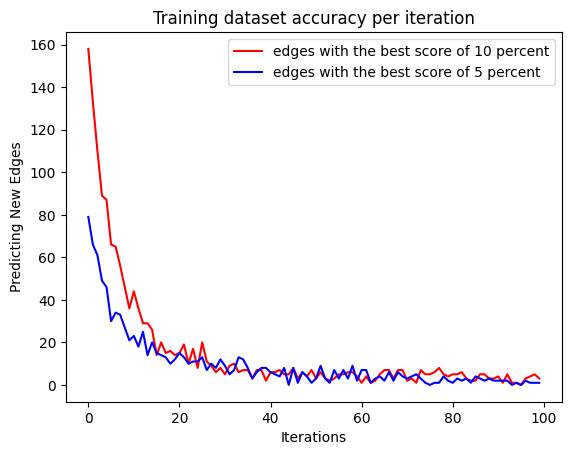

In [3]:
# Read data from CSV file
csv_file = '/content/drive/MyDrive/final project/link prediction.csv'  
data = []
with open(csv_file, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        data.append(row)

# Extract columns
column1 = [float(row[0]) for row in data]
column2 = [float(row[1]) for row in data]

# Create plot
plt.plot(column1, 'r', label='edges with the best score of 10 percent')
plt.plot(column2, 'b', label='edges with the best score of 5 percent')

# Set labels and title
plt.xlabel('Iterations')
plt.ylabel('Predicting New Edges')
plt.title('Training dataset accuracy per iteration')

# Add legend
plt.legend()

# Display the plot
plt.show()

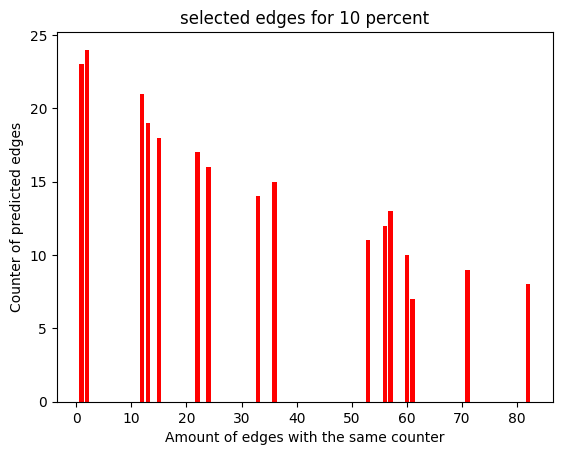

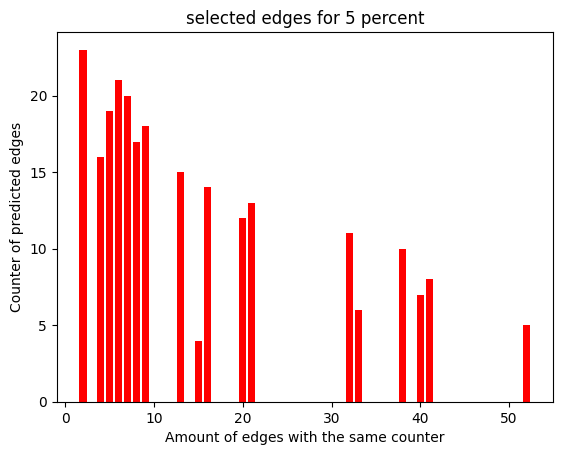

In [15]:
#Displaying the edges defined as vital in the graph

def graph_of_results(file_path, number):
  # Read the CSV file into a pandas DataFrame
  data = pd.read_csv(file_path, header=None)
  # Get the values and their counts from the second column
  value_counts = data.iloc[:, 1].value_counts()
  # Extract the values and counts as separate lists
  values = value_counts.index.tolist()   # Values
  counts = value_counts.values.tolist()  # Counts

  # Plot the data as a bar graph
  plt.bar(counts, values, color='red')
  plt.ylabel('Counter of predicted edges')
  plt.xlabel('Amount of edges with the same counter')
  plt.title(f'selected edges for {number} percent')
  plt.show()

graph_of_results('/content/drive/MyDrive/final project/selected_edges_for_10_percent.csv' , 10 )
print()
graph_of_results('/content/drive/MyDrive/final project/selected_edges_for_5_percent.csv', 5)